## <center>Time Series Analysis<br>
<center>**November 28th, 2018** <br>
<center>**Austin Jarvis** </center>

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from pandas import tseries
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np
from numpy import polyfit
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams['figure.figsize'] = [8, 6]

C:\Users\austi\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Look into Robberies dataset for time series analysis

In [2]:
df=pd.read_csv('data/monthly-robberies.csv', header=0,index_col=0, parse_dates=True,squeeze=True)
df = df.astype('float')

###  Plot the series

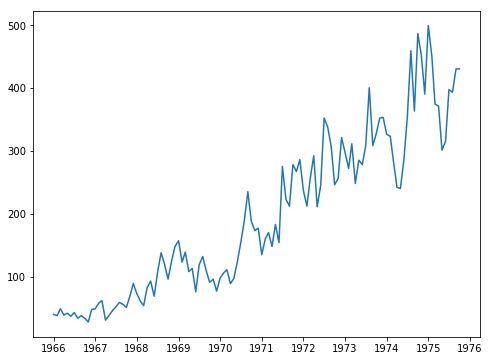

In [3]:
plt.plot(df)
plt.show()

### Perform a Dickey-Fuller test on the series, to determine stationarity

In [4]:
from statsmodels.tsa.stattools import adfuller
X = df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.001102
p-value: 0.994278
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582


not-stationary, p-value > 0.05

### Plot the ACF & PACF 

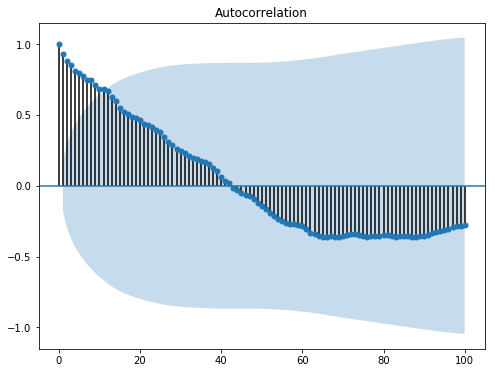

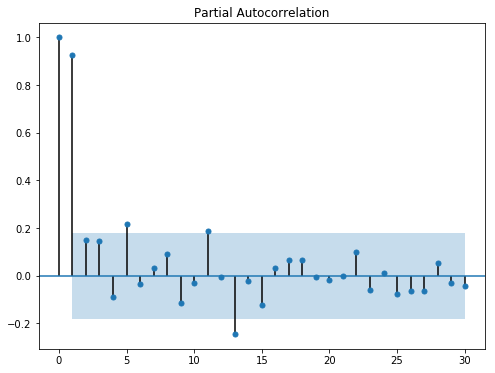

In [5]:
plot_acf(df, lags = 100)
plot_pacf(df, lags = 30)
plt.show()

### Perform differencing on the series  to achieve stationarity

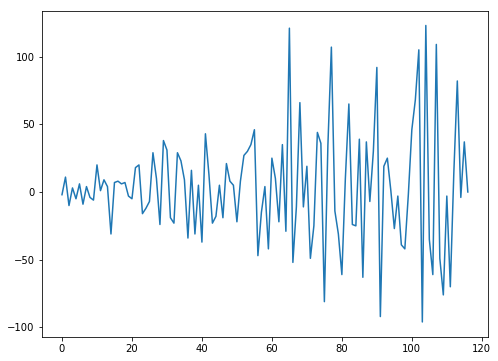

ADF Statistic: -7.428564
p-value: 0.000000
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582


In [6]:

X = df.values

diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i-1]
    diff.append(value)
plt.plot(diff)
plt.show()

X = diff
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


Stationary, P-value is < 0.05

### Plot the ACF & PACF of the differenced data 

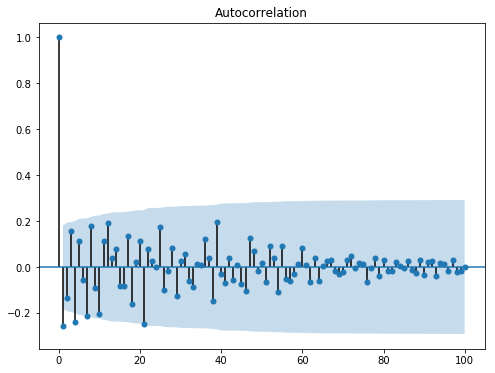

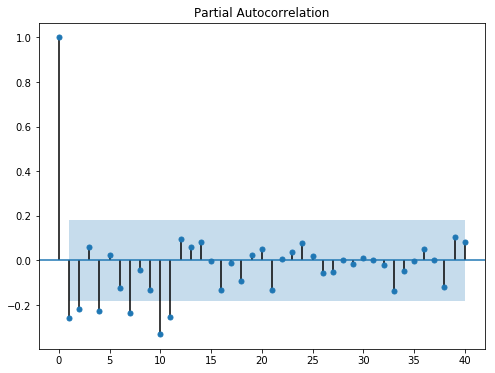

In [7]:
plot_acf(diff, lags = 100)
plot_pacf(diff, lags = 40)
plt.show()

### Run an ARIMA analysis

In [8]:
# Could have chosen 4th order for p due to the 3rd order being in noise and 4th being out of noise
p = 2
d = 1
q = 1
#dfArray = np.array(df, dtype=np.float)
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df, order = (p,d,q))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\austi\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\austi\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:            D.Robberies   No. Observations:                  117
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -592.107
Method:                       css-mle   S.D. of innovations             38.118
Date:                Fri, 30 Nov 2018   AIC                           1194.213
Time:                        00:24:02   BIC                           1208.024
Sample:                    02-01-1966   HQIC                          1199.820
                         - 10-01-1975                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.2980      2.539      1.299      0.197      -1.679       8.275
ar.L1.D.Robberies    -0.8811      0.168     -5.235      0.000      -1.211      -0.551
ar.L2.D.Robberies    -0.

### Plot the residuals.

C:\Users\austi\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


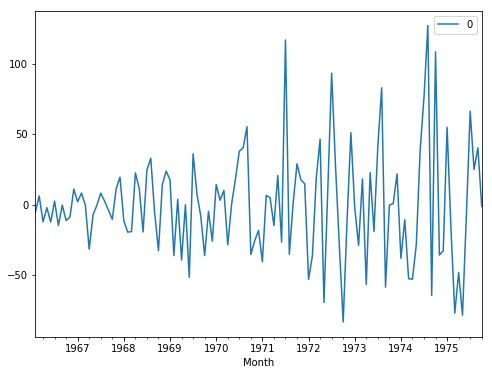

In [9]:
from pandas import DataFrame
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

### Plot the residual distribution (kind='kde').

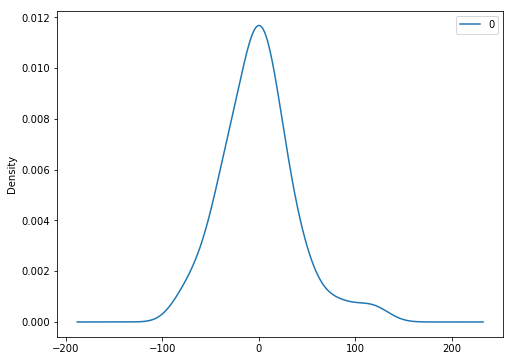

In [10]:
residuals.plot(kind='kde')
plt.show()

### Print the residuals summary.

In [11]:
print(residuals.describe())

                0
count  117.000000
mean     0.002929
std     38.282841
min    -83.077266
25%    -25.757240
50%     -0.239517
75%     18.435407
max    127.310495


### Plot the ACF & PACF 

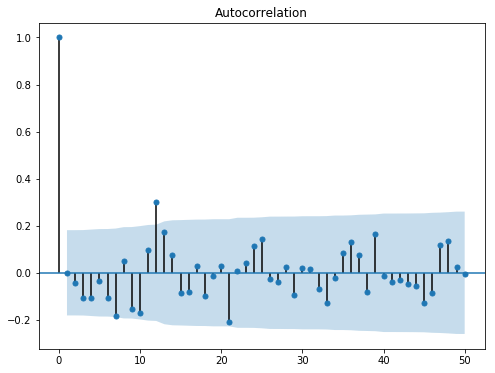

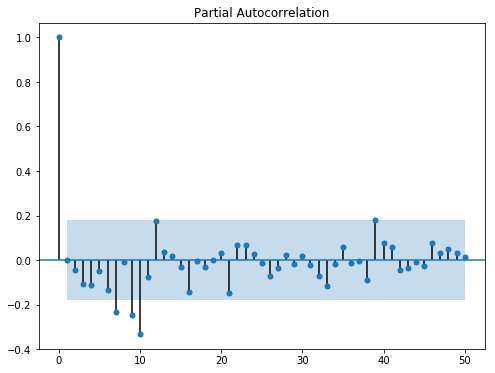

In [12]:
plot_acf(residuals, lags = 50)
plt.show()
plot_pacf(residuals, lags = 50)
plt.show()

### Compare the model results series to the actuals:

In [13]:

resids = model_fit.resid
yhat = list()
#print(len(resids))
#print(len(diff))
for i in range(0, len(resids)):
    value = df[i] - resids[i]
    yhat.append(value)

In [14]:
added = list()
added.append(diff[0])
for i in range(0, len(yhat)):
    value = yhat[i] + diff[i]
    added.append(value)

X=df.values

Compare model (red) to original data (blue)


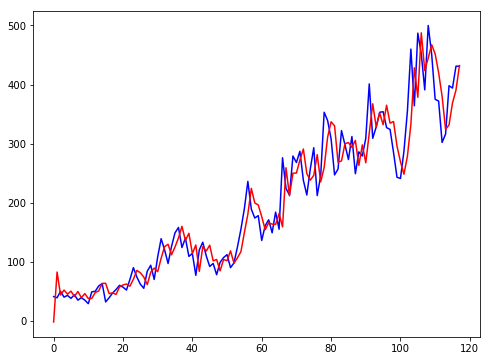

In [15]:
print('Compare model (red) to original data (blue)')
plt.plot(X, color = 'blue')
plt.plot(added, color='red')
plt.show()

## Create a AIC grid search and run 'robberies.csv' through it to find the optimum p,d,q order

In [16]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
p_values = range(0,7)
d_values = range(0,3)
q_values = range(0,7)
df = df.astype('float32')
warnings.filterwarnings("ignore")
best_score = float("inf")
best_cfg =  None
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                model = ARIMA(df, order)
                model_fit = model.fit(disp=0)
                AIC = ARIMAResults.aic(model_fit)
                if AIC < best_score:
                    best_score, best_cfg = AIC, order
                print('ARIMA%s AIC=%.3f' % (order, AIC))
            except:
                continue
#print()
print("Best: ARIMA%s AIC=%.3f" % (best_cfg, best_score))
#print()

ARIMA(0, 0, 0) AIC=1483.025
ARIMA(0, 0, 1) AIC=1370.440
ARIMA(0, 0, 2) AIC=1333.202
ARIMA(0, 0, 3) AIC=1287.209
ARIMA(0, 1, 0) AIC=1205.224
ARIMA(0, 1, 1) AIC=1195.267
ARIMA(0, 1, 2) AIC=1189.947
ARIMA(0, 1, 3) AIC=1191.445
ARIMA(0, 1, 4) AIC=1183.620
ARIMA(0, 1, 5) AIC=1185.307
ARIMA(0, 1, 6) AIC=1186.504
ARIMA(0, 2, 0) AIC=1303.089
ARIMA(0, 2, 1) AIC=1202.619
ARIMA(1, 0, 0) AIC=1218.687
ARIMA(1, 0, 1) AIC=1211.669
ARIMA(1, 0, 2) AIC=1211.484
ARIMA(1, 0, 3) AIC=1215.083
ARIMA(1, 0, 5) AIC=1216.962
ARIMA(1, 1, 0) AIC=1199.151
ARIMA(1, 1, 1) AIC=1184.928
ARIMA(1, 2, 0) AIC=1263.837
ARIMA(2, 0, 0) AIC=1214.296
ARIMA(2, 1, 0) AIC=1195.470
ARIMA(2, 1, 1) AIC=1194.213
ARIMA(2, 2, 0) AIC=1228.646
ARIMA(2, 2, 1) AIC=1193.682
ARIMA(3, 0, 0) AIC=1211.780
ARIMA(3, 0, 1) AIC=1210.067
ARIMA(3, 1, 0) AIC=1197.020
ARIMA(3, 1, 1) AIC=1196.212
ARIMA(3, 2, 0) AIC=1228.152
ARIMA(3, 2, 1) AIC=1195.123
ARIMA(4, 0, 0) AIC=1212.907
ARIMA(4, 0, 1) AIC=1211.985
ARIMA(4, 1, 0) AIC=1192.454
ARIMA(4, 1, 1) AIC=1

## Compare the results of the original (p,d,q) estimate to the results from the grid search (p,d,q).

In [17]:
p = 4
d = 1
q = 1
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df, order = (p,d,q))
model_fit = model.fit(disp=0)
#print(model_fit.summary())
residualsOriginal = DataFrame(model_fit.resid)

print('\nACF PACF Estimated Results\n',residualsOriginal.describe())



p = 6
d = 1
q = 3
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df, order = (p,d,q))
model_fit = model.fit(disp=0)
#print(model_fit.summary())
residuals = DataFrame(model_fit.resid)

print('Grid Results\n',residuals.describe())


ACF PACF Estimated Results
                 0
count  117.000000
mean    -1.241213
std     35.921010
min    -67.213482
25%    -24.314069
50%     -3.818972
75%     14.429513
max    110.489604
Grid Results
                 0
count  117.000000
mean    -1.033486
std     34.379642
min    -76.025225
25%    -21.853578
50%     -5.024447
75%     14.589451
max    109.871852


ACF PACF Estimates - Compare model (red) to original data (blue)


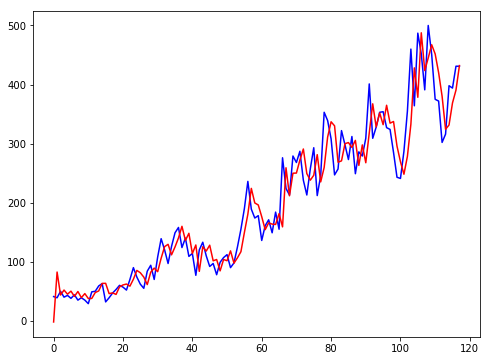

Grid Search - Compare model (red) to original data (blue)


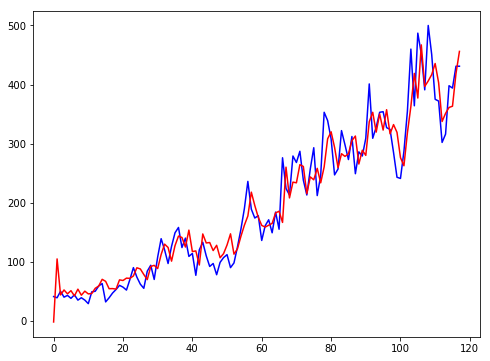

In [18]:
p = 2
d = 1
q = 1
#dfArray = np.array(df, dtype=np.float)
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df, order = (p,d,q))
model_fit = model.fit(disp=0)
#print(model_fit.summary())
resids = model_fit.resid
yhat = list()
#print(len(resids))
#print(len(diff))
for i in range(0, len(resids)):
    value = df[i] - resids[i]
    yhat.append(value)
added = list()
added.append(diff[0])
for i in range(0, len(yhat)):
    value = yhat[i] + diff[i]
    added.append(value)

X = df.values

print('ACF PACF Estimates - Compare model (red) to original data (blue)')
plt.plot(X, color = 'blue')
plt.plot(added, color='red')
plt.show()




p = 6
d = 1
q = 3
#dfArray = np.array(df, dtype=np.float)
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df, order = (p,d,q))
model_fit = model.fit(disp=0)
#print(model_fit.summary())
resids = model_fit.resid
yhat = list()
#print(len(resids))
#print(len(diff))
for i in range(0, len(resids)):
    value = df[i] - resids[i]
    yhat.append(value)
added = list()
added.append(diff[0])
for i in range(0, len(yhat)):
    value = yhat[i] + diff[i]
    added.append(value)

X = df.values


print('Grid Search - Compare model (red) to original data (blue)')
plt.plot(X, color = 'blue')
plt.plot(added, color='red')
plt.show()


##  Forecast 'robberies.csv' based on an ARIMA (2,1,1) model:

Split the series into 75% train, 25% test

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt
X = df.values
train_size=int(len(X)*0.75)
train,test=X[0:train_size],df[train_size:]
history = [x for x in test]

###  Perform a dynamic forecast for all points in 'test'. Plot the forecasted data and the prediction intervals on top of the atual data.¶

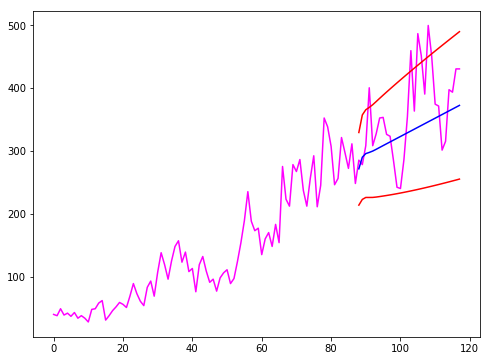


Full prediction interval:


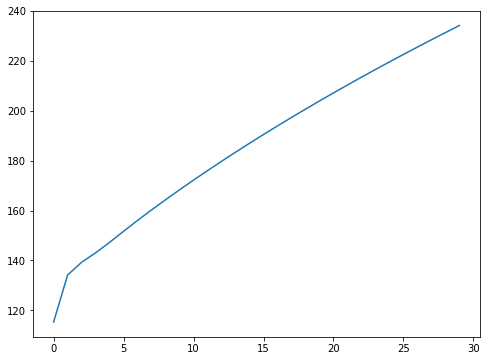

In [20]:
X = df.values
X = X.astype('float64')
size = int(len(X)*0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

p = 2
d = 1
q = 1

model = ARIMA(history, order = (p,d,q))
model_fit = model.fit(disp=0)
predictions = model_fit.forecast(steps=len(test))[0]
limits = DataFrame(model_fit.forecast(steps=len(test))[2])
lowerlimit = limits[0]
upperlimit = limits[1]
predictionint = upperlimit-lowerlimit

plt.plot(X, color = 'magenta')
plt.plot([None for i in train] + [x for x in predictions], color = 'blue')
plt.plot([None for i in train] + [x for x in lowerlimit], color = 'red')
plt.plot([None for i in train] + [x for x in upperlimit], color = 'red')
plt.show()
print()
print('Full prediction interval:')
plt.plot(predictionint)
plt.show()

### Perform a rolling forecast for all points in 'test'. Plot the forecasted data and the prediction intervals on top of the actual data.

predicted=272.287976, expected=286.000000
predicted=298.817204, expected=279.000000
predicted=289.525727, expected=309.000000
predicted=308.059383, expected=401.000000
predicted=364.606450, expected=309.000000
predicted=310.591773, expected=328.000000
predicted=330.552250, expected=353.000000
predicted=344.866395, expected=354.000000
predicted=347.608690, expected=327.000000
predicted=336.462022, expected=324.000000
predicted=337.337379, expected=285.000000
predicted=315.232986, expected=243.000000
predicted=287.444044, expected=241.000000
predicted=279.420105, expected=287.000000
predicted=304.985641, expected=355.000000
predicted=347.327548, expected=460.000000
predicted=419.031828, expected=364.000000
predicted=349.529538, expected=487.000000
predicted=430.011810, expected=452.000000
predicted=427.221263, expected=391.000000
predicted=389.246334, expected=500.000000
predicted=461.709241, expected=451.000000
predicted=457.925386, expected=375.000000
predicted=429.096621, expected=372

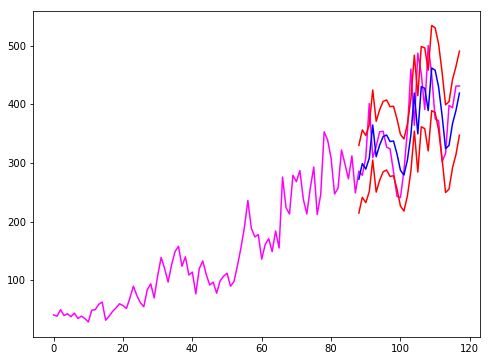


Full prediction interval:


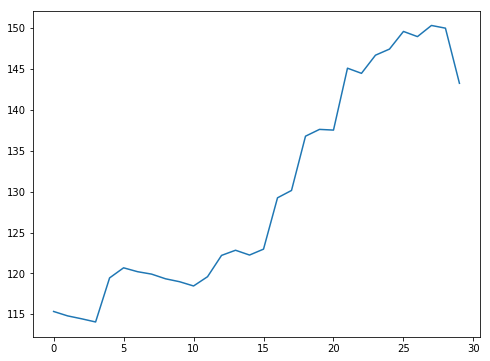

In [21]:
predictions = list()
lowerlimit = list()
upperlimit = list()
predictionint = list()

X = df.values
X = X.astype('float64')
size = int(len(X)*0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

p = 2
d = 1
q = 1

for t in range(len(test)):
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit(disp=0)
    
    yhat = model_fit.forecast()[0]
    lolim = model_fit.forecast()[2][0][0]
    uplim = model_fit.forecast()[2][0][1]
    interval = uplim - lolim
    
    predictions.append(yhat)
    lowerlimit.append(lolim)
    upperlimit.append(uplim)
    predictionint.append(interval)
    
    obs = test[t]
    history.append(obs)
    
    print('predicted=%f, expected=%f' % (yhat,obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(X, color = 'magenta')
plt.plot([None for i in train] + [x for x in predictions], color = 'blue')
plt.plot([None for i in train] + [x for x in lowerlimit], color = 'red')
plt.plot([None for i in train] + [x for x in upperlimit], color = 'red')
plt.show()
print()
print('Full prediction interval:')
plt.plot(predictionint)
plt.show()